# Loan Predication Data Analysis

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

In [4]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/ninzaami/loan-predication' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: noyonkhan
Your Kaggle Key: ········


100%|██████████| 7.83k/7.83k [00:00<00:00, 5.27MB/s]

The dataset has been downloaded and extracted.

In [5]:
# Change this
data_dir = './loan-predication'

In [6]:
import os
os.listdir(data_dir)

['train_u6lujuX_CVtuZ9i (1).csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "Loan Predication Data Analysis" # change this (use lowercase letters and hyphens only)

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "sinoyon/Loan Predication Data Analysis"
[jovian] Committed successfully! https://jovian.ai/sinoyon/loan-predication-data-analysis


'https://jovian.ai/sinoyon/loan-predication-data-analysis'

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



In [11]:
import pandas as pd

In [12]:
loan_df=pd.read_csv(data_dir+"/train_u6lujuX_CVtuZ9i (1).csv")

In [13]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
loan_df['Loan_Status'].replace('N',0,inplace=True)
loan_df['Loan_Status'].replace('Y',1,inplace=True)

In [25]:
loan_df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [26]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [27]:
loan_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


In [29]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
loan_df['Gender'].fillna(value=loan_df['Gender'].mode()[0],inplace=True)

In [32]:
loan_df['Gender'].isnull().sum()

0

In [33]:
loan_df['Gender'].describe()

count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object

In [34]:
loan_df['Married'].fillna(loan_df['Married'].mode()[0],inplace= True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0],inplace= True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0],inplace= True)

In [35]:
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0],inplace=True)

In [36]:
loan_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0],inplace=True)
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median(),inplace=True)

In [39]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [42]:
loan_df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [43]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [44]:
import jovian

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sinoyon/loan-predication-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sinoyon/loan-predication-data-analysis


'https://jovian.ai/sinoyon/loan-predication-data-analysis'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [46]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married'>

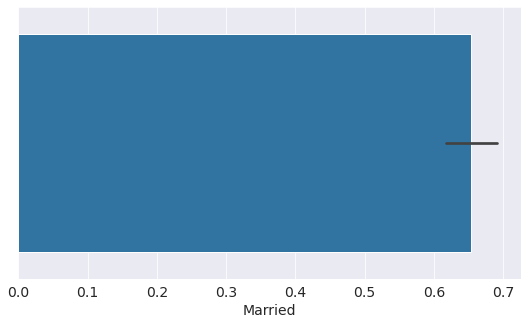

In [51]:
sns.barplot(loan_df.Married)

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:>

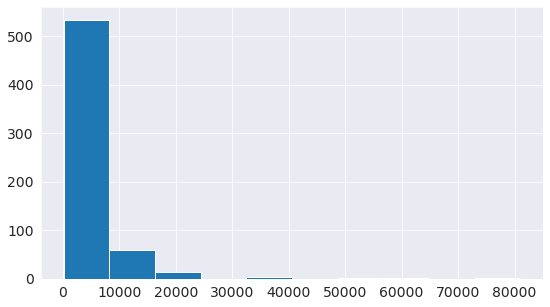

In [52]:
loan_df['ApplicantIncome'].hist()

<AxesSubplot:>

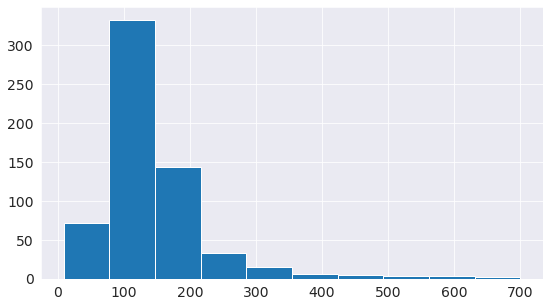

In [59]:
loan_df['LoanAmount'].hist()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

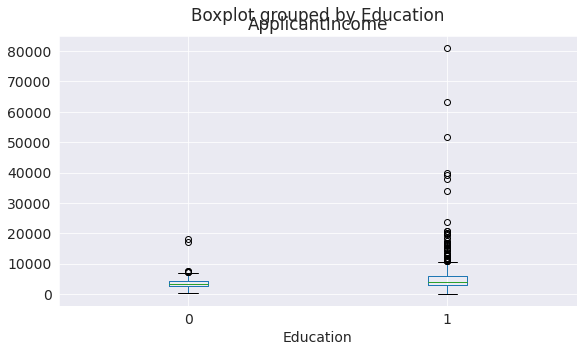

In [53]:
loan_df.boxplot(column='ApplicantIncome', by = 'Education')

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:>

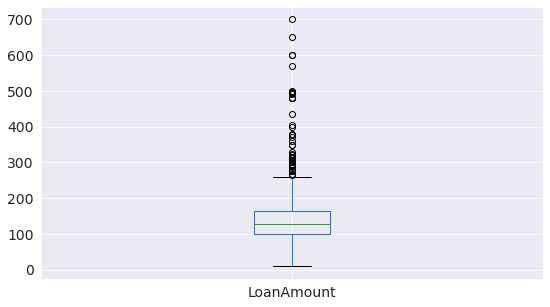

In [55]:
loan_df.boxplot(column='LoanAmount')

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:>

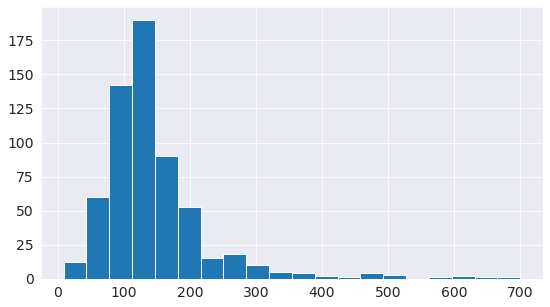

In [56]:
df['LoanAmount'].hist(bins=20)

Let us save and upload our work to Jovian before continuing

In [57]:
import jovian

In [58]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sinoyon/loan-predication-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sinoyon/loan-predication-data-analysis


'https://jovian.ai/sinoyon/loan-predication-data-analysis'

## Asking and Answering Questions

TODO - write some explanation here.



#### Q1: TODO - ask a question here and answer it below

In [63]:
What are Pandas dataframes?
How are Pandas dataframes different from Numpy arrays?
How do you find the number of rows and columns in a dataframe?
How do you get the list of columns in a dataframe?

Object `dataframes` not found.
Object `arrays` not found.
Object `dataframe` not found.
Object `dataframe` not found.


In [64]:
import jovian

In [65]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sinoyon/loan-predication-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sinoyon/loan-predication-data-analysis


'https://jovian.ai/sinoyon/loan-predication-data-analysis'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [66]:
import jovian

In [68]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sinoyon/loan-predication-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sinoyon/loan-predication-data-analysis


'https://jovian.ai/sinoyon/loan-predication-data-analysis'